# Step 3: Model Development and Evaluation
### As we are predicting a continuous value pIC50, we are using edited functions from T022: Ligand-based screening: neural networks

##### Contents: Morgan FP
##### -Random Split
##### -Cluster Split
##### -Stratified pIC50 Split


In [26]:
#All necessary packages are imported in helper_fun
from helper_fun import *

# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

In [27]:
#import csv file "filtered_compounds.csv"
# compounds = pd.read_csv(HERE / "filtered_compounds.csv")
print(compounds.shape)
compounds.head()

(595, 13)


,SMILES,CID,r_avg_IC50,f_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,morgan,f_avg_pIC50,r_avg_pIC50
35,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,14.641091,26.719515,<rdkit.Chem.rdchem.Mol object at 0x1516bfe60>,287.105862,3,1,3.28768,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.573171,4.834427
36,O=C(Cc1cncc2ccccc12)Nc1ccccc1,DAR-DIA-23aa0b97-20,45.077469,57.590417,<rdkit.Chem.rdchem.Mol object at 0x1516be340>,262.110613,2,1,3.41600,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.239650,4.346040
126,Cc1c(N)cncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-3,8.201698,4.222340,<rdkit.Chem.rdchem.Mol object at 0x1516bfc30>,275.082540,3,2,2.80682,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.374447,5.086096
129,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,TRY-UNI-714a760b-6,13.895165,24.581194,<rdkit.Chem.rdchem.Mol object at 0x1516bfca0>,260.071641,2,1,3.22462,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.609397,4.857136
135,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,TRY-UNI-714a760b-12,45.689263,64.508813,<rdkit.Chem.rdchem.Mol object at 0x1516bfb50>,261.066890,2,2,3.68742,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.190381,4.340186


# Random Split

In [28]:
# Split the data into training and test set
#random_state helps to reproduce results, if not set the splits will be different every time
#train_test_split(*arrays, test_size, train_size, random_state) = x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(
    compounds["morgan"], compounds[["f_avg_pIC50"]], test_size=0.2, random_state=42
)

# Print the shape of training and testing data
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of test data: {x_test.shape}")
print(f"Shape of training data: {y_train.shape}")
print(f"Shape of test data: {y_test.shape}")
# print(x_test)
# NBVAL_CHECK_OUTPUT

Shape of training data: (476,)
Shape of test data: (119,)
Shape of training data: (476, 1)
Shape of test data: (119, 1)
10036    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12445    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14629    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14690    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9355     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                               ...                        
15093    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13943    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16605    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13459    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4740     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: morgan, Length: 119, dtype: object


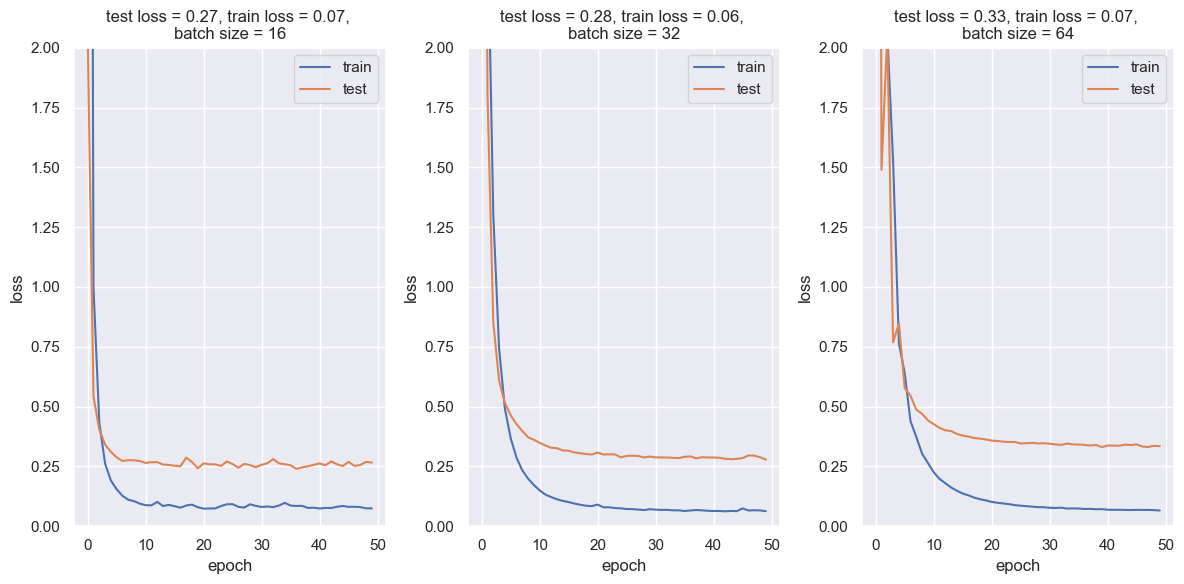

In [42]:
# Neural network parameters

#number of training samples used in one forward/backward pass
batch_sizes = [16, 32, 64]

# epoch is one complete pass through the entire training dataset.
#higher epoch can improve model performance but may lead to overfitting
nb_epoch = 50

#number of neurons in the first and secondb hidden layer 
layer1_size = 64
layer2_size = 32

# Plot test loss scores
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train))).astype(float),
        y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 2))

    #print a title that displays test loss, train loss and batch size
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, train loss = {history.history['loss'][nb_epoch-1]:.2f}, \nbatch size = {batch}"
    )
plt.tight_layout()
plt.show()

##### Loss curve helps to measure the dissimilarity between a models predicted output and true output

##### -We look for a smooth curve as it means that the model's performance changes gradually and consistently during training. 
##### -All three models converge at similar points
##### -Zooming into the convergence we see that a batch size of 32 is the smoothest curve whilst having a similar test and train loss to other batch sizes.

##### We shall proceed with batch size = 32


In [43]:
# Save the trained model
filepath = DATA / "best.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x_train))).astype(float),
    y_train.values,
    epochs=nb_epoch,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=0,
)

##### We are able to check for overfitting by comparing test loss to training loss.
##### If test loss is significantly highter than training loss, may be indicative of overfitting

In [44]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test))), y_test.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 0.33
 mse (same as loss): 0.33
 mae: 0.36


In [45]:
# Predict pIC50 values on x_test data
y_pred = model.predict(np.array(list((x_test))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred[0:5]]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4.89
4.07
4.65
6.77
4.83


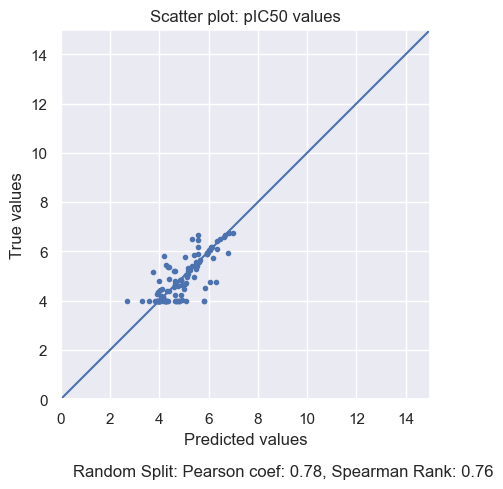

In [62]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)
pearsoncoef = np.corrcoef(y_pred.flatten(), y_test.values.flatten())[0,1]
spearmancoef = spearmanr(y_pred.flatten(), y_test.values.flatten()).correlation
fig.text(0.9, -0.05, f"Random Split: Pearson coef: {pearsoncoef:.2f}, Spearman Rank: {spearmancoef:.2f}", horizontalalignment='right', fontsize=12)
plt.show()

# Split by cluster

In [63]:
#Code adapted from T005
# Get the cluster center of each cluster (first molecule in each cluster)
cluster_centers = [comp_arr[c[0]] for c in clusters if len(c)>1]

# How many cluster centers/clusters do we have?

print("Number of cluster centers:", len(cluster_centers))
# NBVAL_CHECK_OUTPUT

# Sort the molecules within a cluster based on their similarity
# to the cluster center and sort the clusters based on their size

#In T005, singletons are excluded from the sorted_clusters array ! 
#len(sorted_clusters) = 96
#num_singletons = 156
#total num clusters (inc sing) = 252
sorted_clusters = []
num_singletons = 0
for cluster in clusters:
    if len(cluster) <= 1:
        num_singletons += 1
        continue  # Singletons
    else:
    # Compute fingerprints for each cluster element
        sorted_fingerprints = [rdkit_gen.GetFingerprint(comp_arr[i][0]) for i in cluster]
    # Similarity of all cluster members to the cluster center
        similarities = DataStructs.BulkTanimotoSimilarity(
            sorted_fingerprints[0], sorted_fingerprints[1:]
    )
    # Add index of the molecule to its similarity (centroid excluded!)
        similarities = list(zip(similarities, cluster[1:]))
    # Sort in descending order by similarity
        similarities.sort(reverse=True)
    # Save cluster size and index of molecules in clusters_sort
        sorted_clusters.append((len(similarities), [i for _, i in similarities]))
    # Sort in descending order by cluster size
        sorted_clusters.sort(reverse=True)

# print(len(sorted_clusters))
# print(num_singletons)

Number of cluster centers: 96


##### We want to pick a diverse group of molecules to train from 595 molecules in comp_arr
##### With an 80/20 split, we want to select ~ 475 molecules to be part of training data set
##### Whilst cutoff = 0.225, number of clusters = 252

In [64]:
# Count selected molecules, pick cluster centers first
# There are currently 96 cluster centres (aka centres of clusters > 1)
morgan_train_mol = cluster_centers.copy()

random.seed(42)
singleton_clusters = [cluster for cluster in clusters if len(cluster)==1]
rand_train_sing = random.sample(singleton_clusters, int(num_singletons*0.9))
morgan_train_mol += [comp_arr[cluster[0]] for cluster in rand_train_sing]

# Take 10 molecules (or a maximum of 50%) of each cluster starting with the largest one
index = 0
pending = 475 - len(morgan_train_mol)
while pending > 0 and index < len(sorted_clusters):
    # Take indices of sorted clusters
    tmp_cluster = sorted_clusters[index][1]
    # If the first cluster is > 10 big then take exactly 10 compounds
    if sorted_clusters[index][0] > 10:
        num_compounds = 10
    # If smaller, take half of the molecules
    else:
        num_compounds = int(0.9 * len(tmp_cluster)) + 1
    if num_compounds > pending:
        num_compounds = pending
    # Write picked molecules and their structures into list of lists called picked_fps
    morgan_train_mol += [comp_arr[i] for i in tmp_cluster[:num_compounds]]
    index += 1
    pending = 475 - len(morgan_train_mol)
print("# Selected training molecules:", len(morgan_train_mol))
print("# Selected test molecules:", len(comp_arr)-len(morgan_train_mol))

# Selected training molecules: 475
# Selected test molecules: 120


In [65]:
morgan_test_mol = [c for c in comp_arr if c not in morgan_train_mol]
print(len(morgan_test_mol))
#list of tuples
#tuples in structure: rdkit.Chem.rdchem.Mol, CID

120


In [66]:
#morgan is x and f_avg_pIC50 is y
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
x_train_list = [rdkit_gen.GetFingerprint(mol) for mol, idx in morgan_train_mol]
x_test_list = [rdkit_gen.GetFingerprint(mol) for mol, idx in morgan_test_mol]

#must convert lists to pd data series
x_train_clus = pd.Series( (v for v in x_train_list))
x_test_clus = pd.Series( (v for v in x_test_list))
print(x_train_clus.shape)
print(x_test_clus[:2])

(475,)
0    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
1    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
dtype: object


In [67]:
cids_train = [tup[1] for tup in morgan_train_mol]
y_train_clus = compounds.loc[compounds["CID"].isin(cids_train), "f_avg_pIC50"]
cids_test =  [tup[1] for tup in morgan_test_mol]
y_test_clus = compounds.loc[compounds["CID"].isin(cids_test), "f_avg_pIC50"]
print(len(morgan_train_mol))
print(x_train_clus.shape)
print(y_train_clus.shape)

475
(475,)
(475,)


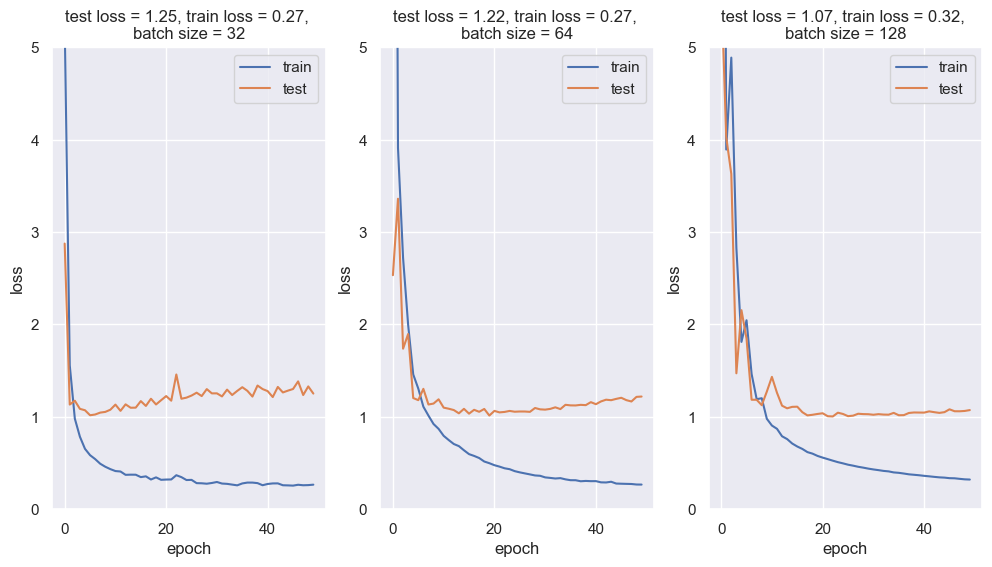

In [69]:
# Neural network parameters

#number of training samples used in one forward/backward pass
batch_sizes = [32, 64, 128]

# epoch is one complete pass through the entire training dataset.
#higher epoch can improve model performance but may lead to overfitting
nb_epoch = 50

#number of neurons in the first and secondb hidden layer 
layer1_size = 64
layer2_size = 32

# Plot test loss scores
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train_clus))).astype(float),
        y_train_clus.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test_clus))).astype(float), y_test_clus.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 5))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, train loss = {history.history['loss'][nb_epoch-1]:.2f}, \nbatch size = {batch}"
    )
plt.show()

##### The test loss does not plateau, as the random split did this tells us that this is an issue with the split. The model is not learning well from the split. 

##### We can detect overfitting as training loss seems to continue to decrease whilst test loss is increasing. 

##### The curves are also extremely turbulent, this is another indication that the neural net is not learning well from this model.

####### Ver 1.0) The test loss for this split based on clusters/ligand similarity seem to be higher than with a random split. Test loss is also lower as batch size increases so these examples have batch sizes 32, 64 and 128 with test loss values ~ 1.10.

####### Ver 1.1) This could be to do with how we treat singletons in cell 39. They may all end up in the test dataset. This is something we should go back and ammend.
####### After editing code so that ~80% of singletons are included in the training data test loss values ~ 1.30 ! [WORSE!!]

####### This may be because our train/test split is 332/263 [56/44], also we have not taken into account pIC50 values. 

####### Ver 1.2) I have edited code s.t. singletons are excluded from cluster centres and there is a random, reproducible split of 80% of the clusters in the training data. Test/train split is 434/161 [73/27] test loss values ~ 1.40 !!

####### Ver 1.3) The model seemed to do better when all singletons were included in the training dataset. (Ver 1.0). This seems counter intuitive. This is possibly because if the model is trained on all singletons + a selection of clusters and there are no singletons to test the model on then the model has a less diverse test dataset. It is good to have an 80/20 split among singletons.  With test loss being smaller with larger batch sizes, I have increase batch sizes to [32, 64, 128] test loss values ~ 1.40 [batch_size = 128 seems to do the best]

In [70]:
# Save the trained model
filepath = DATA / "best.clus.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]


model.fit(
    np.array(list((x_train_clus))).astype(float),
    y_train_clus.values,
    epochs=nb_epoch,
    batch_size=128,
    callbacks=callbacks_list,
    verbose=0,
)


In [71]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test_clus))), y_test_clus.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.20
 mse (same as loss): 1.20
 mae: 0.90


In [72]:
# Predict pIC50 values on x_test data
y_pred_clus = model.predict(np.array(list((x_test_clus))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred_clus[0:5]]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5.16
5.14
4.88
6.30
4.11


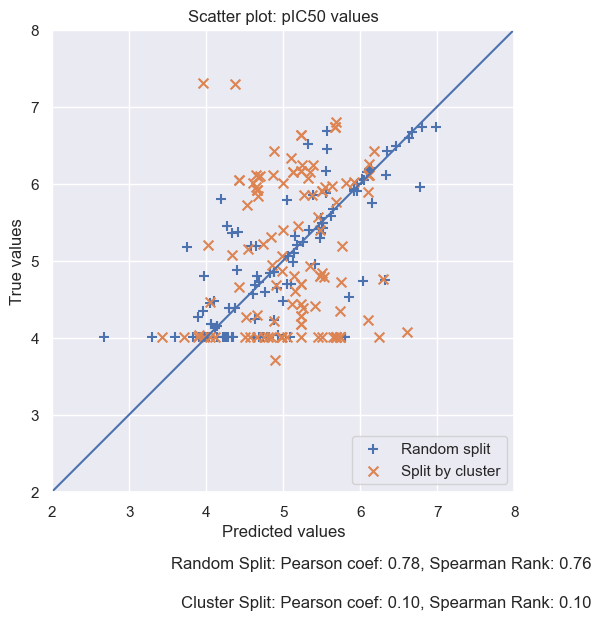

In [73]:
# Scatter plot
limits = 2, 8
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.scatter(y_pred, y_test, marker="+", s=50, label = "Random split")
ax1.scatter(y_pred_clus, y_test_clus, marker="x", s=50, label="Split by cluster")

#coefficients 
pearsoncoef_clus = np.corrcoef(y_pred_clus.flatten(), y_test_clus.values.flatten())[0,1]

#spearman's rank correlation
spearmancoef_clus = spearmanr(y_pred_clus.flatten(), y_test_clus.values.flatten()).correlation

lin = np.linspace(*limits, 100)
ax1.plot(lin, lin)
ax1.set_aspect("equal", adjustable="box")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Scatter plot: pIC50 values")
ax1.set_xlim(limits)
ax1.set_ylim(limits)
ax1.legend()

#pearsoncoef and spearman coef taken from first scatter plot cell
ax1.text(9, 1.0, f"Random Split: Pearson coef: {pearsoncoef:.2f}, Spearman Rank: {spearmancoef:.2f}", horizontalalignment='right', fontsize=12)
ax1.text(9, 0.5, f"Cluster Split: Pearson coef: {pearsoncoef_clus:.2f}, Spearman Rank: {spearmancoef_clus:.2f}", horizontalalignment='right', fontsize=12)
plt.show();

##### The majority of predicted values are smaller than the true values (LHS of x=y line). There is, however, a line of true values of 4 whose predicted values are to the right of the x=y line. Going back to the histograms, there is a disproportionate number of molecules in the dataframe with pIC50 values between 4.0 and 4.5. 


##### Possibly the error is originating from a disproportiate number of molecules with pIC50 values in either the test or train set. 

# Stratified pIC50 split

In [74]:
# Create bins for the f_avg_pIC50 values
bin_edges = np.arange(compounds['f_avg_pIC50'].min(), compounds['f_avg_pIC50'].max() + 0.5, 0.5)
compounds['pIC50_range'] = pd.cut(compounds['f_avg_pIC50'], bins=bin_edges, include_lowest=True)

nan_count = compounds['pIC50_range'].isna().sum()
# compounds.dropna(subset=["morgan", "f_avg_pIC50", "pIC50_range"])

In [75]:
# Print the distribution of the bins to check if it's reasonable
x_train_pIC, x_test_pIC, y_train_pIC, y_test_pIC = train_test_split(
    compounds["morgan"], compounds["f_avg_pIC50"], test_size=0.2,
    stratify=compounds['pIC50_range'])

print(f"Shape of training data: {x_train_pIC.shape}")
print(f"Shape of test data: {x_test_pIC.shape}")

Shape of training data: (476,)
Shape of test data: (119,)


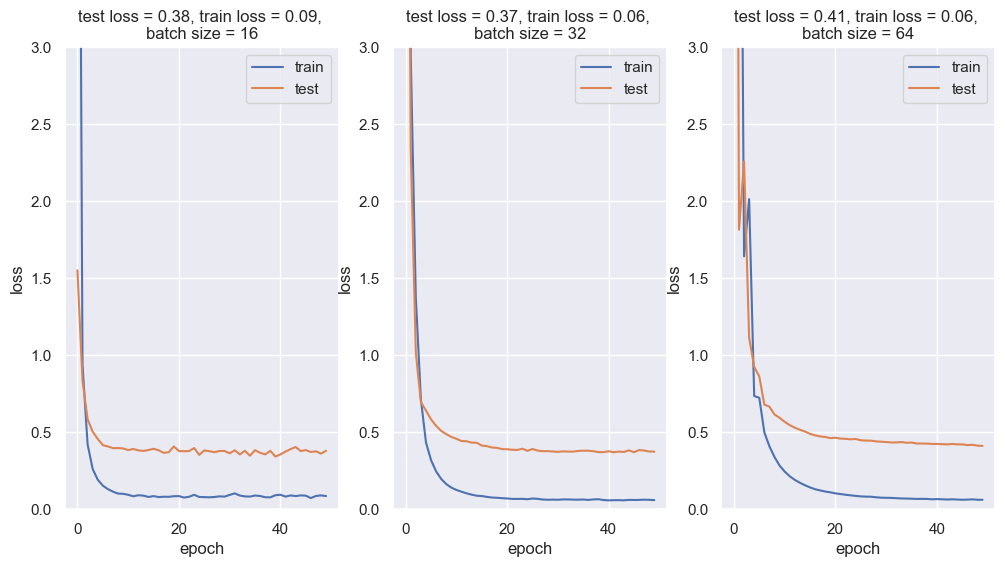

In [78]:
# Neural network parameters

#number of training samples used in one forward/backward pass
batch_sizes = [16, 32, 64]

# epoch is one complete pass through the entire training dataset.
#higher epoch can improve model performance but may lead to overfitting
nb_epoch = 50

#number of neurons in the first and secondb hidden layer 
layer1_size = 64
layer2_size = 32

# Plot test loss scores
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train_pIC))).astype(float),
        y_train_pIC.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test_pIC))).astype(float), y_test_pIC.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 3))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, train loss = {history.history['loss'][nb_epoch-1]:.2f}, \nbatch size = {batch}"
    )
plt.show()

##### Again the curve seems to be the smoothest for batch size = 32
##### We also see extremely similar results in test and train loss, if not a lower loss on both account for batch size = 32

In [79]:
# Save the trained model
filepath = DATA / "best.pIC.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x_train_pIC))).astype(float),
    y_train_pIC.values,
    epochs=nb_epoch,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=0,
)

# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test_pIC))), y_test_pIC.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 0.41
 mse (same as loss): 0.41
 mae: 0.41


In [80]:
# Predict pIC50 values on x_test data
y_pred_pIC = model.predict(np.array(list((x_test_pIC))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred_pIC[0:5]]

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x15fcbdd00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4.41
4.12
6.06
5.32
4.17


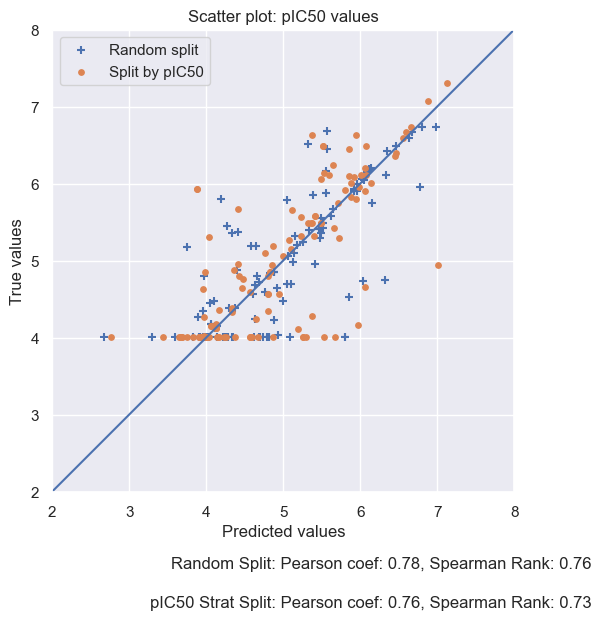

In [81]:
# Scatter plot
limits = 2, 8
fig, ax1 = plt.subplots(figsize=(6, 6))

#display and add legend of pearson coefficient for y_pred, y_test and y_pred_pIC and y_test_pIC
# pearsoncoef = np.corrcoef(y_pred.flatten(), y_test.values.flatten())[0,1]
pearsoncoef_pIC50 = np.corrcoef(y_pred_pIC.flatten(), y_test_pIC.values.flatten())[0,1]

#spearman's rank correlation
# spearmancoef = spearmanr(y_pred.flatten(), y_test.values.flatten()).correlation
spearmancoef_pIC50 = spearmanr(y_pred_pIC.flatten(), y_test_pIC.values.flatten()).correlation

ax1.scatter(y_pred, y_test, marker="+", s=30, label = "Random split")
# ax1.scatter(y_pred_clus, y_test_clus, marker="x", s=50, label="Split by cluster")
ax1.scatter(y_pred_pIC, y_test_pIC, marker=".", s=60, label="Split by pIC50")
lin = np.linspace(*limits, 100)
ax1.plot(lin, lin)
ax1.set_aspect("equal", adjustable="box")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("True values")
ax1.set_title("Scatter plot: pIC50 values")
ax1.set_xlim(limits)
ax1.set_ylim(limits)
##location of text in bottom right hand corner
ax1.text(9, 1.0, f"Random Split: Pearson coef: {pearsoncoef:.2f}, Spearman Rank: {spearmancoef:.2f}", horizontalalignment='right', fontsize=12)
ax1.text(9, 0.5, f"pIC50 Strat Split: Pearson coef: {pearsoncoef_pIC50:.2f}, Spearman Rank: {spearmancoef_pIC50:.2f}", horizontalalignment='right', fontsize=12)

ax1.legend()
plt.show();

##### This split by pIC50 is closest we are to decreasing loss and mae below the random split results
##### We should play around with this, possibly we can link clusters to avg pIC50 values and stratify based on this data

#####  There are a lot of 4.0 true values that the model seems to get wrong. On the other hand if the true pIC50 value is greater than 4.0, the model generally seems to predict a higher pIC50 value

### Chat function:
##### -Implement dropout or L2 regularization to prevent overfitting, which might be causing the model to perform poorly on certain segments of the data. (dropout: random selected neurons are ignored during training, L2: adding a penalty the size of coefficients to the lossfunction, encourages model to keep weights small)

##### -If certain ranges of pIC50 values are more important, you can use a weighted loss function to emphasize the importance of accurately predicting in those ranges. (Assign weights to each datapoint, if pIC50 vlaues around 4.0 are crucial, could be given a higher weight. Calculate weighted loss and then optimize)

##### For the underrepresented pIC50 values, consider data augmentation techniques to increase their representation in the training set. (synthetic data ?!)



# Hybrid pIC50 + cluster Split

In [101]:
# I want to define a function in code that stratifies clusters based on pIC50 values of the cluster centre
# clusters = cluster_fingerprints(fingerprints, cutoff=0.225)


#takes as an input and then returns 
def center_pIC50_clus(clusters_arr):

    # compounds["center_pIC50"] = np.nan

    for cluster in clusters_arr:
        cluster_ind = cluster[0] #cluster_ind is the cluster center's index
        center_CID = comp_arr[cluster_ind][1] #center_CID is an array of the cluster center's CID
        #center_pIC50 is the pIC50 value of the cluster center
        center_pIC50 = compounds.loc[compounds["CID"] == center_CID, "f_avg_pIC50"].values[0]

        #now we are iterating through the compounds in the respective cluster
        for compound_ind in cluster: 
            #we want to fill in center_pIC50 for each compound in the cluster the pIC50 value of the center of the cluster they are in
            compound_CID = comp_arr[compound_ind][1]
            #we are making a new column that contains the pIC50 value of the center of the cluster that compound is in
            compounds.loc[compounds["CID"] == compound_CID, "center_pIC50"] = center_pIC50 
    return compounds.tail()

center_pIC50_clus(clusters)

#35, 36 5.189
# 126 5.3744
# 129 6.1377
# 135 4.002177
#17140 4.847
#17727 5.5784



,SMILES,CID,r_avg_IC50,f_avg_IC50,ROMol,molecular_weight,n_hba,n_hbd,logp,Ro5_fulfilled,morgan,f_avg_pIC50,r_avg_pIC50,pIC50_range,center_pIC50
17140,Cc1ccc(C)c(S(=O)(=O)N2CCN(C(=O)CCl)CC2)c1,RHE-UNK-eb059eb9-1,1.623369,14.216485,<rdkit.Chem.rdchem.Mol object at 0x151660820>,330.080491,3,0,1.37514,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.847208,5.789583,"(4.703, 5.203]",4.847208
17727,O=C(CCl)N1CCN(Cc2cccc(Cl)c2)CC1,HYO-UNK-49a60884-1,0.545448,2.639505,<rdkit.Chem.rdchem.Mol object at 0x1516606d0>,286.063968,2,0,2.22300,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.578478,6.263246,"(5.203, 5.703]",5.578478
17758,CO[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2ccc(Cl)cc21,PET-UNK-bcc8fd08-1,0.174061,0.084033,<rdkit.Chem.rdchem.Mol object at 0x151660660>,368.092770,4,1,4.15110,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.075550,6.759299,"(6.703, 7.203]",7.075550
18087,O=C(CCl)N1CCN(S(=O)(=O)c2cccc(F)c2)CC1,BEN-DND-03406596-10,2.023561,3.843760,<rdkit.Chem.rdchem.Mol object at 0x1516605f0>,320.039769,3,0,0.89740,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.415244,5.693884,"(5.203, 5.703]",5.415244
18270,O=C(Nc1cncc2ccccc12)C1CNCc2ccc(Cl)cc21,MAT-POS-d8472c4f-5,2.795197,1.953394,<rdkit.Chem.rdchem.Mol object at 0x151660580>,337.098190,3,2,3.71370,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.709210,5.553588,"(5.703, 6.203]",5.709210
